## importing data from kaggle

In [1]:
! pip install kaggle

In [2]:
# making a kaggle directory
! mkdir ~/.kaggle

In [3]:
# Copy the “kaggle.json” into this new directory

! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [4]:
# Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d kutaykutlu/drowsiness-detection

100% 179M/180M [00:04<00:00, 55.9MB/s]
100% 180M/180M [00:04<00:00, 46.3MB/s]


In [6]:
! unzip /content/drowsiness-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: open_eye/s0024_00466_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00467_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00468_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00469_0_1_1_2_0_01.png  
  inflating: open_eye/s0024_00470_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00471_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00472_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00473_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00474_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00475_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00476_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00477_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00478_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00479_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00480_0_1_1_1_0_01.png  
  inflating: open_eye/s0024_00481_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00482_0_1_1_0_0_01.png  
  inflating: open_eye/s0024_00483_0_1_1_0_0_01.p

## Drowsiness Detection

### Importing Required Libraries

In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

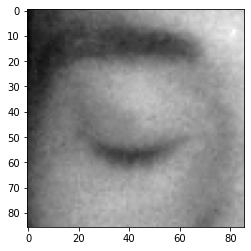

In [2]:
img_ary = cv2.imread("./train_dataset/closed_eye/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_ary, cmap='gray')

In [3]:
img_ary.shape

(86, 86)

In [4]:
Datadirectory = "./train_dataset" # taining datasets
Classes = ["closed_eye", "open_eye"] # List of classes

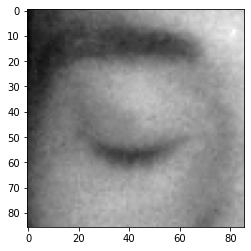

In [5]:
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_arry = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    bacttorgb = cv2.cvtColor(img_arry, cv2.COLOR_GRAY2BGR)
    plt.imshow(img_arry, cmap="gray")
    plt.show()
    break
  break

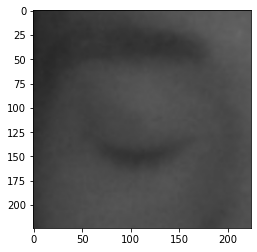

In [6]:
# resizing the img
img_size = 224

new_arry = cv2.resize(bacttorgb, (img_size, img_size))
plt.imshow(new_arry, cmap="gray")
plt.show()

## Reading all the images and converting them into an array for data and labels

In [7]:
training_Data = []

def create_training_data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path)[0:2000]:
      try:
        img_arry = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        bacttorgb = cv2.cvtColor(img_arry, cv2.COLOR_GRAY2BGR)
        new_arry = cv2.resize(bacttorgb, (img_size, img_size))
        training_Data.append([new_arry, class_num])
      except (OSError, AttributeError) as error:
        print(error)

create_training_data()

In [14]:
print(len(training_Data))

4000


In [15]:
# shuffling the data to overcome with overfitting
import random

random.shuffle(training_Data)

In [16]:
X = []
y = []

for features, label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape

(4000, 224, 224, 3)

In [17]:
# Normalize the data

X = X.astype('float32') / 255.0

Y = np.array(y)

In [9]:
import pickle

# pickle_out = open("x.pickle", 'wb')
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", 'wb')
# pickle.dump(Y, pickle_out)
# pickle_out.close()

In [ ]:

pickle_in = open("./x.pickle",'rb')
X = pickle.load(pickle_in)

pickle_in = open("./y.pickle",'rb')
y = pickle.load(pickle_in)

## Deep learning model for training

In [20]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models, layers, Model

In [21]:
model = tf.keras.applications.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer Learning

In [23]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## setting for binary classification

In [26]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.fit(X, y, epochs=10, validation_split = 0.1)

Epoch 1/10
113/113 [==============================] - 37s 197ms/step - loss: 0.1375 - accuracy: 0.9589 - val_loss: 0.4028 - val_accuracy: 0.8350
Epoch 2/10
113/113 [==============================] - 21s 187ms/step - loss: 0.0296 - accuracy: 0.9925 - val_loss: 0.1224 - val_accuracy: 0.9350
Epoch 3/10
113/113 [==============================] - 21s 190ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 4/10
113/113 [==============================] - 22s 192ms/step - loss: 0.0119 - accuracy: 0.9944 - val_loss: 0.0302 - val_accuracy: 0.9875
Epoch 5/10
113/113 [==============================] - 22s 194ms/step - loss: 0.0091 - accuracy: 0.9986 - val_loss: 0.1237 - val_accuracy: 0.9625
Epoch 6/10
113/113 [==============================] - 22s 195ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0539 - val_accuracy: 0.9900
Epoch 7/10
113/113 [==============================] - 22s 198ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0877 - val_ac

In [27]:
new_model.save('drowsiness.h5')

## checking the network for prediction

In [28]:
img_array = cv2.imread('/content/open_eye/s0001_01843_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backrgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array1 = cv2.resize(backrgb, (img_size, img_size))

In [29]:
X_input = np.array(new_array1).reshape(1,img_size, img_size, 3)
X_input.shape

(1, 224, 224, 3)

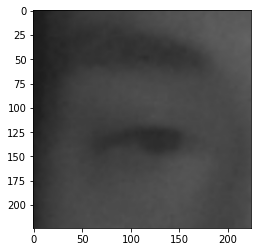

In [30]:
plt.imshow(new_array1)

In [31]:
X_input = X_input.astype('float32')/255.0

In [32]:
prediction = new_model.predict(X_input)

In [33]:
prediction

array([[0.9999993]], dtype=float32)

## for unknown images

In [34]:
img = cv2.imread("/content/open_eye/s0001_01846_0_0_1_0_0_01.png")

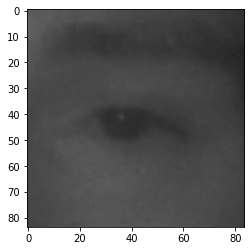

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + "/content/haarcascade_frontalface_default.xml")

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "/content/haarcascade_eye.xml")

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

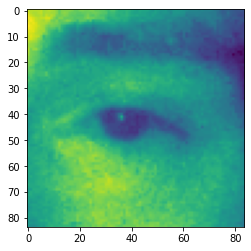

In [44]:
plt.imshow(gray)

In [53]:
eyes = facecascade.detectMultiScale(gray, 1.1, 4)

error: ignored

In [46]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h),(0,255, 0), 2)

error: ignored

In [52]:
cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = facecascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

error: ignored